In [1]:


import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt



df = pd.read_csv('/content/housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


$$\Large\text{Question 1}$$

### Code for preprocessing and trainigin of the model

In [2]:
df = df.drop('ocean_proximity', axis=1)

<Figure size 800x600 with 0 Axes>

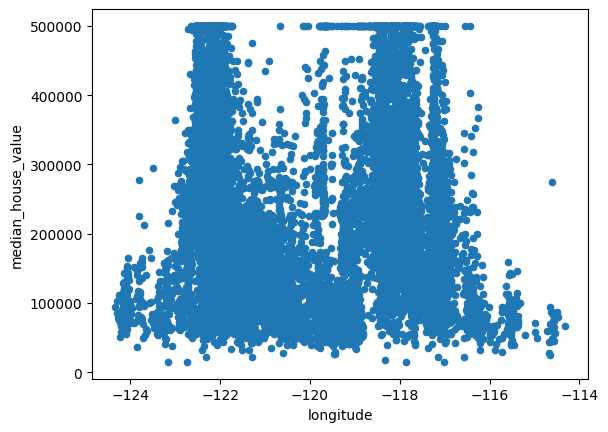

<Figure size 800x600 with 0 Axes>

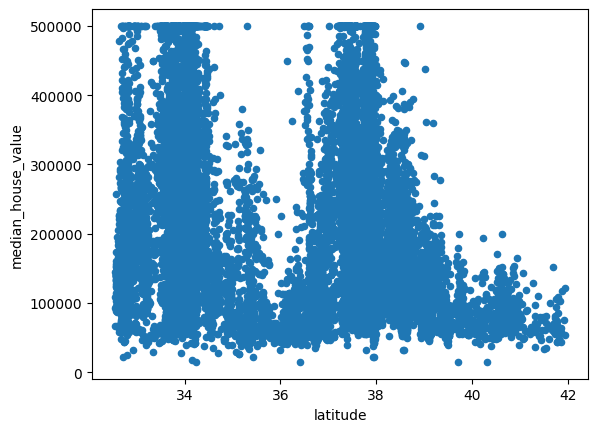

<Figure size 800x600 with 0 Axes>

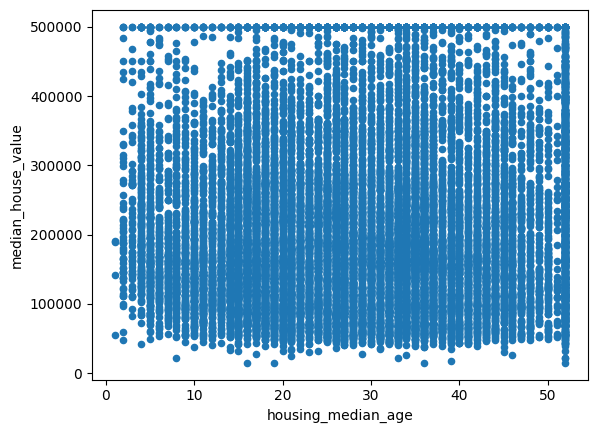

<Figure size 800x600 with 0 Axes>

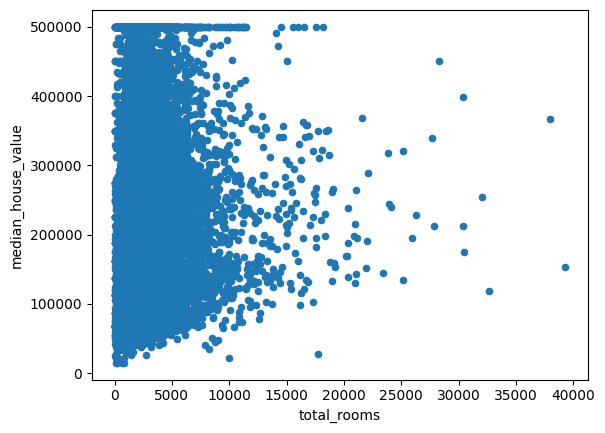

<Figure size 800x600 with 0 Axes>

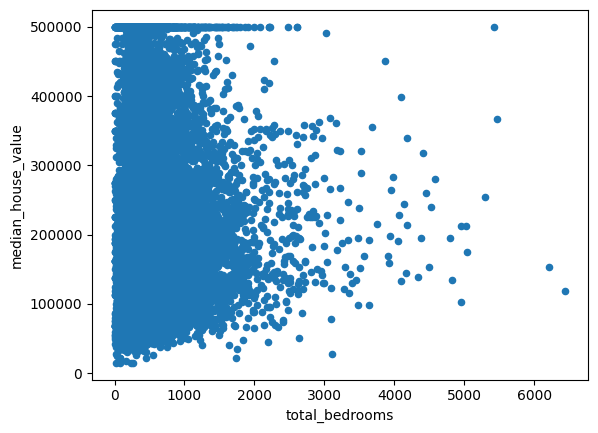

<Figure size 800x600 with 0 Axes>

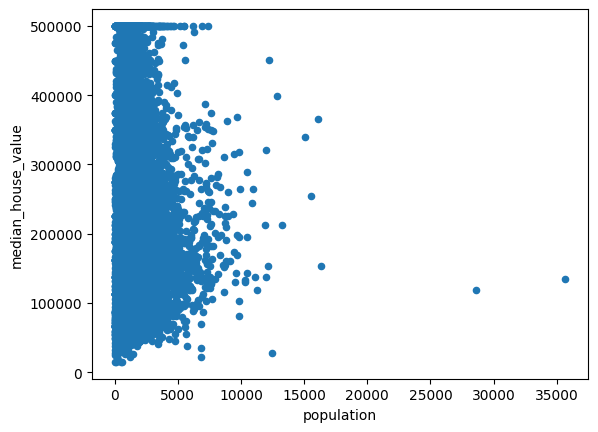

<Figure size 800x600 with 0 Axes>

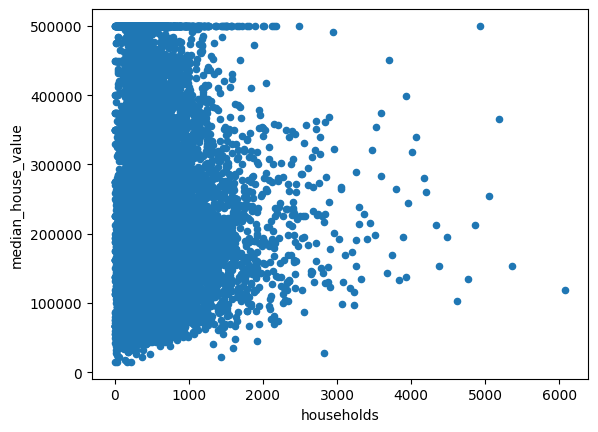

<Figure size 800x600 with 0 Axes>

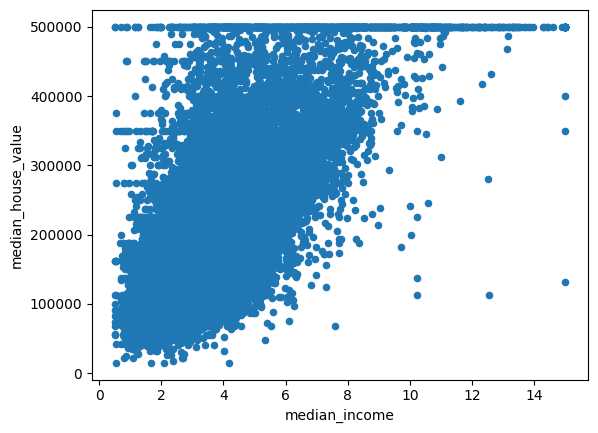

<Figure size 800x600 with 0 Axes>

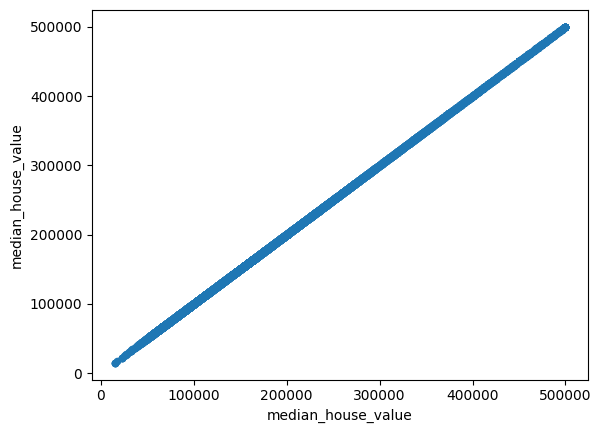

In [3]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    df.plot(kind='scatter', x=col, y='median_house_value')
    plt.show()

In [4]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0


In [5]:
# Fillign the missing values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [6]:
# Separate features and target
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [7]:
# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Define the neural network model
model = models.Sequential()

# Input layer
model.add(
    layers.Dense(
        64,
        activation='relu',
        input_dim=X_train.shape[1]
    )
)

# Hidden layers
model.add(
    layers.Dense(
        128,
        activation='relu'
    )
)

model.add(
    layers.Dense(
        64,
        activation='relu'
    )
)

# Output layer
model.add(
    layers.Dense(1)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

### Summary of model architecture

In [11]:
# Number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model for 20 epochs
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 52541751296.0000 - mae: 198053.0469 - val_loss: 14338948096.0000 - val_mae: 87246.0078
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11691160576.0000 - mae: 79400.4766 - val_loss: 8685600768.0000 - val_mae: 66600.9922
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7963457024.0000 - mae: 64108.9570 - val_loss: 6837379072.0000 - val_mae: 59738.3555
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6417082368.0000 - mae: 57817.2969 - val_loss: 5841131008.0000 - val_mae: 55497.4766
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5415614464.0000 - mae: 53485.1367 - val_loss: 5272300032.0000 - val_mae: 52654.9648
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4922659328.0000 - mae: 51174.9883 - val_loss: 4987156480.0000 - val_mae: 50758.9570
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4722274304.0000 - mae: 49865.3867 - val_loss: 4830825984.0000 - val_mae:

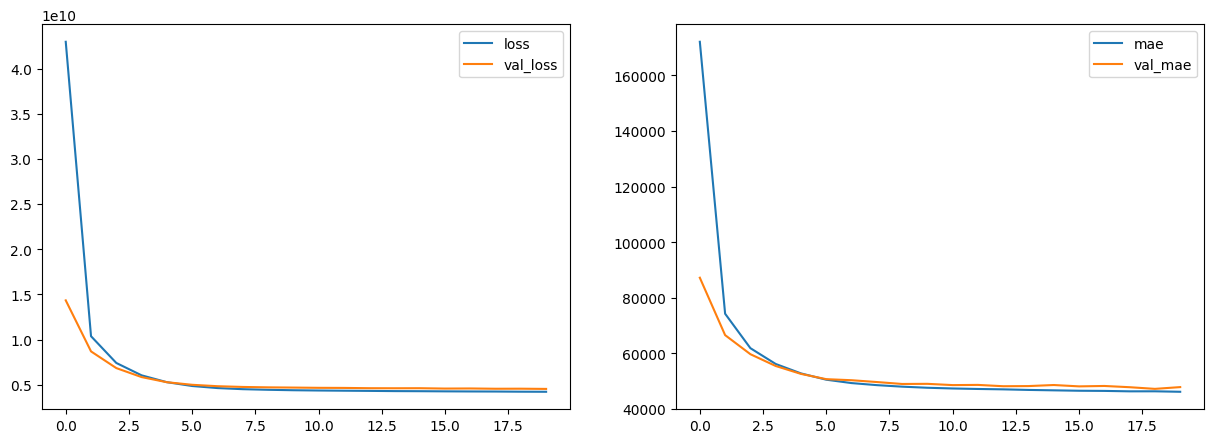

In [13]:
# Plottging the curve to se the loss
df_hist = pd.DataFrame(history.history)

fig, ax = plt.subplots(1,2, figsize=(15,5))
df_hist.plot(y=['loss', 'val_loss'], ax=ax[0])
df_hist.plot(y=['mae', 'val_mae'], ax=ax[1])
plt.show()

### Table for showing the training and validation MAE for all epochs

In [14]:
print(df_hist)

            loss            mae      val_loss       val_mae
0   4.297879e+10  172110.687500  1.433895e+10  87246.007812
1   1.036865e+10   74300.210938  8.685601e+09  66600.992188
2   7.406097e+09   61907.777344  6.837379e+09  59738.355469
3   6.035329e+09   56228.062500  5.841131e+09  55497.476562
4   5.276493e+09   52832.519531  5.272300e+09  52654.964844
5   4.852792e+09   50566.074219  4.987156e+09  50758.957031
6   4.624662e+09   49350.894531  4.830826e+09  50379.886719
7   4.501320e+09   48610.222656  4.748876e+09  49727.007812
8   4.433752e+09   48064.832031  4.704290e+09  49031.000000
9   4.384871e+09   47669.082031  4.679185e+09  49078.921875
10  4.354503e+09   47410.839844  4.651416e+09  48625.332031
11  4.332396e+09   47231.925781  4.641224e+09  48694.496094
12  4.311757e+09   47092.578125  4.610251e+09  48218.585938
13  4.288614e+09   46886.312500  4.603421e+09  48274.675781
14  4.278149e+09   46740.660156  4.609098e+09  48653.257812
15  4.260992e+09   46592.460938  4.56926

### Model Ecaluation for test data

In [15]:
# Evaluate the model on the test set
mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error (MAE): {mae[1]}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4560056320.0000 - mae: 48489.4961
Mean Absolute Error (MAE): 47692.25390625


$$\Large\text{Question 2}$$

In [16]:
# Apply Dropout and L2 Regularization to the model
model_with_regularization = models.Sequential()


# Input layer with L2 regularization
model_with_regularization.add(
    layers.Dense(
        64,
        activation='relu',
        input_dim=X_train.shape[1],
        kernel_regularizer=regularizers.l2(0.05))
)

# Hidden layers with Dropout and L2 regularization
model_with_regularization.add(
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.05)
    )
)

model_with_regularization.add(
    layers.Dropout(0.2)
)


model_with_regularization.add(
    layers.Dense(
        64,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.05)
    )
)

model_with_regularization.add(
    layers.Dropout(0.2)
)

# Output layer
model_with_regularization.add(
    layers.Dense(1)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

In [17]:
# Compile the model with regularization
model_with_regularization.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)



In [18]:
# Train the model with regularization for 20 epochs
history_reg = model_with_regularization.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 53517185024.0000 - mae: 199968.4375 - val_loss: 14939136000.0000 - val_mae: 88911.4453
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12156890112.0000 - mae: 81032.6953 - val_loss: 8772403200.0000 - val_mae: 67518.2031
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8442019328.0000 - mae: 66417.7578 - val_loss: 7036404736.0000 - val_mae: 60437.7422
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6920209920.0000 - mae: 60377.9766 - val_loss: 5984111104.0000 - val_mae: 55900.0859
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6054793216.0000 - mae: 56221.6914 - val_loss: 5374974976.0000 - val_mae: 52590.2812
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5529873920.0000 - mae: 54380.2188 - val_loss: 5040641536.0000 - val_mae: 51463.8086
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5306568192.0000 - mae: 52899.6523 - val_loss: 4886217216.0000 - val_mae:

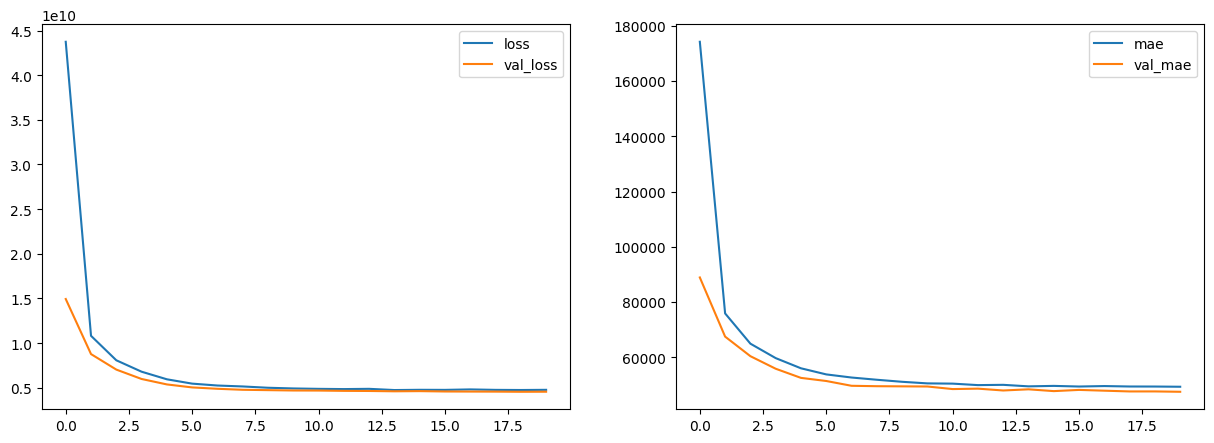

In [19]:
df_reg_hist = pd.DataFrame(history_reg.history)

fig, ax = plt.subplots(1,2, figsize=(15,5))
df_reg_hist.plot(y=['loss', 'val_loss'], ax=ax[0])
df_reg_hist.plot(y=['mae', 'val_mae'], ax=ax[1])

plt.show()

In [20]:
df_reg_hist

,loss,mae,val_loss,val_mae
0,4.374030e+10,174153.296875,1.493914e+10,88911.445312
1,1.081806e+10,75904.554688,8.772403e+09,67518.203125
2,8.078325e+09,64965.707031,7.036405e+09,60437.742188
3,6.800062e+09,59742.515625,5.984111e+09,55900.085938
4,5.949426e+09,56057.953125,5.374975e+09,52590.281250
5,5.464074e+09,53848.988281,5.040642e+09,51463.808594
6,5.252454e+09,52720.179688,4.886217e+09,49730.621094
7,5.147772e+09,51914.343750,4.774844e+09,49581.050781
8,5.001712e+09,51174.925781,4.735205e+09,49527.066406
9,4.924301e+09,50601.335938,4.695149e+09,49474.097656


In [21]:
# Evaluate the regularized model on the test set
mae_reg = model_with_regularization.evaluate(X_test, y_test)
print(f'Mean Absolute Error (MAE) with Regularization: {mae_reg[1]}')



129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4605752320.0000 - mae: 48413.6641
Mean Absolute Error (MAE) with Regularization: 47419.80859375


### Table showing the MAE before and after applying the regularizaton


In [22]:
    # [df_hist['mae'], df_reg_hist['mae']]
mae_table = pd.concat([df_hist['mae'], df_reg_hist['mae']], axis=1)
mae_table

,mae,mae
0,172110.687500,174153.296875
1,74300.210938,75904.554688
2,61907.777344,64965.707031
3,56228.062500,59742.515625
4,52832.519531,56057.953125
5,50566.074219,53848.988281
6,49350.894531,52720.179688
7,48610.222656,51914.343750
8,48064.832031,51174.925781
9,47669.082031,50601.335938


### Brief explanation of regularization affect the models architecture perofromance

As we can see regularization have helped in this cas but in just reduces the small amount of error.

From Mean Absolute Error (MAE): 47539.1640625 using regular model to

To Mean Absolute Error (MAE) with Regularization: 47240.3125


With experiemnting the multiple values of l2 there are chances of getting more better results.



$$\Large\text{Question 3}$$

In [23]:
# Compare results
print(f'MAE (original model): {mae[1]}')
print(f'MAE (regularized model): {mae_reg[1]}')



MAE (original model): 47692.25390625
MAE (regularized model): 47419.80859375


### Table with metrices MAE,RSME, R2

In [24]:
# Evaluate the model using MAE, RMSE, and R² score
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

y_pred_reg = model_with_regularization.predict(X_test)
mae_reg = mean_absolute_error(y_test, y_pred)
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_reg = r2_score(y_test, y_pred)


result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred.flatten(),
    'Predicted_reg': y_pred_reg.flatten()
})
print(result_df)

df_metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value_normal': [mae, rmse, r2],
    'Value_regularized': [mae_reg, rmse_reg, r2_reg]
})

print(df_metrics.T)



129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
         Actual      Predicted  Predicted_reg
20046   47700.0   69519.351562   62140.953125
3024    45800.0  165489.359375  159574.343750
15663  500001.0  326085.031250  318536.281250
20484  218600.0  266480.531250  258963.250000
9814   278000.0  297229.750000  292131.000000
...         ...            ...            ...
15362  263300.0  198256.609375  191197.906250
16623  266800.0  283557.062500  273204.750000
18086  500001.0  453834.375000  444043.968750
2144    72300.0   97710.312500   97382.164062
3665   151500.0  155476.968750  150650.421875

[4128 rows x 3 columns]
                             0             1         2
Metric                     MAE          RMSE        R²
Value_normal       47692.25758  66654.026091  0.660964
Value_regularized  47692.25758  66654.026091  0.660964


### Code for generating the plot

Text(0, 0.5, 'Predicted Values')

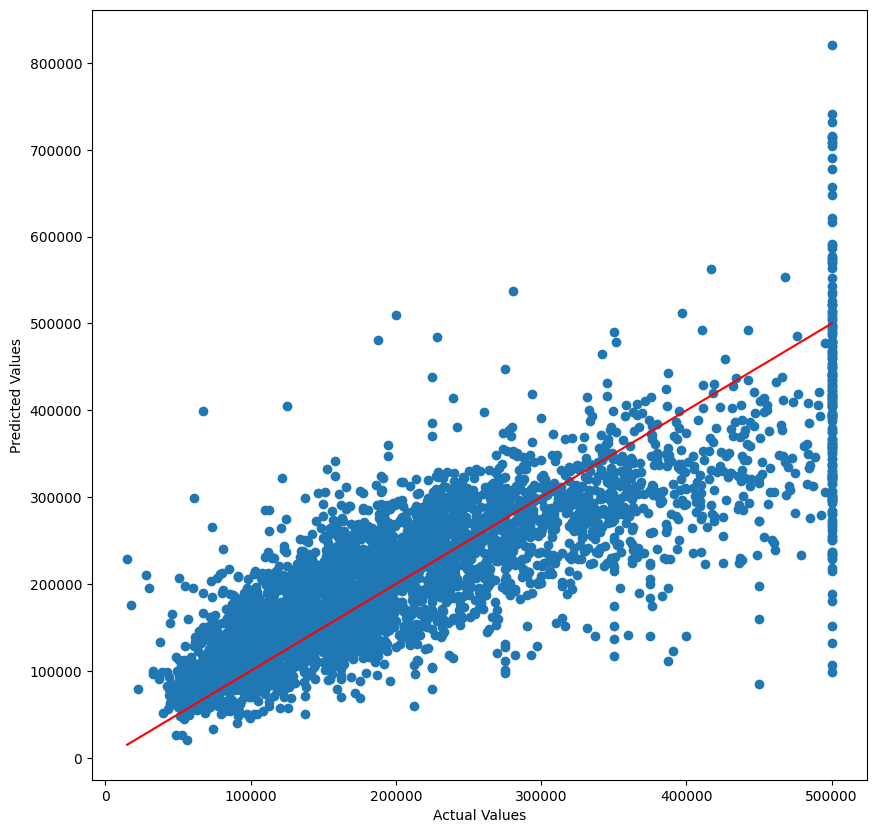

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(x=result_df['Actual'],  y=result_df['Predicted'], marker='o')

plt.plot(
    [min(result_df['Actual']), max(result_df['Actual'])],
    [min(result_df['Actual']), max(result_df['Actual'])],
    color='red'
)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# A brief explanation of the result and model interpretation

R-squared (R²) represents the proportion of variance in the dependent variable which is predictable from the independent variables.

A higher R²(~0.6) score suggests in my model is doing a good job of capturing the relationships between the features and the target variable.
